# Modelagem de dispersão

Nesta atividade vocês precisarão implementar o modelo gaussiano no Python. Vocês devem realizar os seguintes tópicos:

- Implementar uma função para determinar a classe de estabilidade de Pasquil para diferentes condições atmosféricas.

- Implementar a função de estimativa de coefiente de dispersão (sigmaYZ) para todas as classes de estabilidade.

- Implementar a função de estimativa de sobrelevação da pluma utilizando os métodos de Davidson-Bryant, Holland e Briggs (quem fizer o método de Briggs ganha um ponto a mais). Deve ser considerado o efeito Tip-Downwash

- Implementar a função do modelo gaussiano

- Realizar simulações com o script criado, utilizando diferentes classes de estabilidade, velocidades do vento, alturas de chaminé. Considere a taxa de emissão que você estimou na primeira atividade. Encontre a altura de chaminé necessária para que as concentrações não violem os padrões da Resolução CONAMA 491.

- Faça figuras e discuta os resultados.

In [126]:
# Criando função de classe de estabilidade de Pasquil

def classePasquill(v,I,cco,cob):
    if cob == 1: # Valor 1 para quando tem cobertura
        classe = 'D'
    elif v < 2:
        if I <= 0:
            classe = 'F'
        elif I > 0 and I < 350:
            classe = 'B'
        elif I >= 350 and I < 700:
            classe = 'A' # Ou B
        else:
            classe = 'A'
    elif v >= 2 and v < 3:
        if I <= 0:
            if cco >=4:
                classe = 'E'
            else:
                classe = 'F'
        elif I > 0 and I < 350:
            classe = 'C'
        elif I >= 350 and I < 700:
            classe = 'B'
        else:
            classe = 'A' # Ou B
    elif v >= 3 and v < 5:
        if I <= 0:
            if cco >=4:
                classe = 'D'
            else:
                classe = 'E'
        elif I > 0 and I < 350:
            classe = 'C'
        elif I >= 350 and I < 700:
            classe = 'B' # Ou C
        else:
            classe = 'B'
    elif v >= 5 and v < 6:
        if I <= 0:
            if cco >=4:
                classe = 'D'
            else:
                classe = 'D'
        elif I > 0 and I < 350:
            classe = 'D'
        elif I >= 350 and I < 700:
            classe = 'C' # Ou D
        else:
            classe = 'C'
    else:
        if I <= 0:
            if cco >=4:
                classe = 'D'
            else:
                classe = 'D'
        elif I > 0 and I < 350:
            classe = 'D'
        elif I >= 350 and I < 700:
            classe = 'D'
        else:
            classe = 'C'
    return classe

In [127]:
# Criando função da estimativa da dispersão lateral e vertical da pluma
def sigmaXY(x,classe,urbOrRural):
    if urbOrRural =='urbano':
        if classe == 'A' or classe == 'B':
            sigmaY = 0.32*x*(1+0.0004*x)**(-0.5) 
            sigmaZ = 0.24*x*(1+0.001*x)**(0.5)
        elif classe == 'C':
            sigmaY = 0.22*x*(1+0.0004*x)**(-0.5) 
            sigmaZ = 0.20*x
        elif classe == 'D':
            sigmaY = 0.16*x*(1+0.0004*x)**(-0.5) 
            sigmaZ = 0.14*x*(1+0.0003*x)**(-0.5)
        elif classe == 'E' or classe == 'F':
            sigmaY = 0.11*x*(1+0.0004*x)**(-0.5) 
            sigmaZ = 0.08*x*(1+0.0015*x)**(-0.5)
        else:
            print('Classe de estabilidade errada.')
    else:
        if classe == 'A':
            sigmaY = 0.22*x*(1+0.0001*x)**(-0.5) 
            sigmaZ = 0.20*x
        elif classe == 'B':
            sigmaY = 0.16*x*(1+0.0001*x)**(-0.5) 
            sigmaZ = 0.12*x
        elif classe == 'C':
            sigmaY = 0.11*x*(1+0.0001*x)**(-0.5) 
            sigmaZ = 0.08*x*(1+0.0002*x)**(-0.5)
        elif classe == 'D':
            sigmaY = 0.08*x*(1+0.0001*x)**(-0.5) 
            sigmaZ = 0.06*x*(1+0.0015*x)**(-0.5)
        elif classe == 'E':
            sigmaY = 0.06*x*(1+0.0001*x)**(-0.5) 
            sigmaZ = 0.03*x*(1+0.0003*x)**(-1)
        elif classe == 'F':
            sigmaY = 0.04*x*(1+0.0001*x)**(-0.5) 
            sigmaZ = 0.016*x*(1+0.0003*x)**(-1)
        else:
            print('Classe de estabilidade errada.')
    return sigmaY,sigmaZ

In [128]:
# Função para estimar o deltaH com base na equação de Davidson-Bryant
def deltaHdavidsonbryant(d,vs,u,Ts,Tamb):
    deltaH = (d*(vs/u)**(1.4))*(1+(Ts-Tamb)/Tamb)
    return deltaH

def deltaHholland(d,vs,u,Ts,Tamb,p,classe):
    if classe == 'A':
        ac = 1.2
    elif classe == 'B':
        ac = 1.1
    elif classe == 'C' or classe == 'D':
        ac = 1
    elif classe == 'E':
        ac = 0.9
    elif classe == 'F':
        ac = 0.8
    else:
        print('Classe de estabilidade errada')
    deltaH = ac*(vs*d/u)*(1.5+(2.68*p*(Ts-Tamb)*d)/(Ts*1000))
    return deltaH

def deltaHbriggs(d,vs,Ts,Tamb,classe,u):
    Fb = 9.8*((d/2)**2)*vs*(1-Tamb/Ts)
    if classe == 'A':
        dodz = -0.02 + 0.0098
    elif classe == 'B':
        dodz = -0.018 + 0.0098 
    elif classe == 'C':
        dodz = -0.016 + 0.0098 
    elif classe == 'D':
        dodz = -0.01 + 0.0098 
    elif classe == 'E':
        dodz = 0.005 + 0.0098 
    elif classe == 'F':
        dodz = 0.028 + 0.0098 
    else:
        print('Classe de estabilidade errada')
    s = (9.8/Tamb)*(dodz)
    if classe == 'A' or classe == 'B' or classe == 'C' or classe == 'D':
        if Fb < 55:
            deltaTc = 0.0297*Ts*(vs**(1/3))/(d**(2/3))
            if deltaTc > (Ts - Tamb):
                deltaH = 3*d*vs/u
            else:
                deltaH = 21.425*Fb**(3/4)/u
        else:
            deltaTc = 0.0057*Ts*(vs**(2/3)/d**(1/3))
            if deltaTc > (Ts - Tamb):
                deltaH = 3*d*vs/u
            else:
                deltaH = 2.6*(Fb/(u*s))**(1/3)
    elif classe == 'E' or classe == 'F':
        deltaTc = 0.019582*Ts*vs*s**(1/2)
        if deltaTc > (Ts - Tamb):
            Fm = (vs**2)*(d**2)*Tamb/(4*Ts) 
            deltaH1 = 1.5*(Fm/(u*s**(1/2)))**(1/3)
            deltaH2 = 3*d*vs/u
            if deltaH1 > deltaH2:
                deltaH = deltaH2
            else:
                deltaH = deltaH1
        else:
            deltaH = 2.6*(Fb/(u*s))**(1/3)
    return deltaH

In [129]:
#Criando uma função do modelo gaussiano
import numpy as np
def modeloGaussiano(qs,sigmaY,sigmaZ,u,y,z,H):
    termo1 = qs/(2*np.pi*sigmaY*sigmaZ*u)
    termo2 = np.exp((-y**2)/(2*sigmaY**2))
    termo3 = np.exp((-(z-H)**2)/(2*sigmaZ**2)) + np.exp((-(z+H)**2)/(2*sigmaZ**2))
    conc = termo1*termo2*termo3
    conc = conc*10**6
    return conc

In [242]:
# Definindo a classe para 50 situações
import random
import pandas as pd

sit = 50 # Situações

df_dispersao = pd.DataFrame()

velocidades = [1.5,2.5,4,5.5,6]

v = [random.choice(velocidades) for _ in range(sit)] # Varia entre 1, 2.5, 4 e 6
cco = [random.randint(0, 8) for _ in range(sit)] # Varia de 0 a 8

I = []

dia_noite = [random.randint(0, 1) for _ in range(sit)]
for i in range(len(dia_noite)):
    if dia_noite[i] == 0:
        I.append(random.uniform(1, 1000))# Varia de 0 a 1000
    else:
        I.append(0)

cob = []

for i in range(len(cco)):
    if cco[i] == 8:
        cob.append(1)
    else:
        cob.append(0)

classe = []

for i in range(len(cco)):
    classe.append(classePasquill(v[i],I[i],cco[i],cob[i]))

df_dispersao['Dia(0) ou noite(1)'] = dia_noite
df_dispersao['Velocidade do Vento (m/s)'] = v
df_dispersao['Classe de Pasquill'] = classe

In [243]:
# Criando domínio de modelagem 
x = np.linspace(-1,10000,500)
#print(x)
y = np.linspace(-10000,10000,500)

urbOrRural = 'urbano' # Empreendimento se encontra no meio urbano

# Criando matrizes de x e y
xx,yy = np.meshgrid(x,y)

sigmaYlista = []
sigmaZlista = []

# Estimando o coeficiente de dispersão lateral e vertical
for i in range(len(cco)):
    sigmaY,sigmaZ = sigmaXY(xx,classe[i],urbOrRural)
    sigmaYlista.append(sigmaY)
    sigmaZlista.append(sigmaZ)

df_dispersao['SigmaY (m)'] = sigmaYlista 
df_dispersao['sigmaZ (m)'] = sigmaZlista

In [244]:
# Estimando os valores dos poluentes
'''
A emissão máxima de NOx foi de 1.96 g/s
A emissão máxima de PM10 foi de 156.09 g/s
'''
qsNOX = 1.96
qsPM10 = 156.09
qsPM10cor = 156.09*(1-0.96)
print(qsPM10)

# Foi observado que para a emissão em uma chaminé de 200 metros o poluente deveria reduzir em no mínimo 82%, sendo que a única tecnologia encontrada foi a venturi scrubber, que reduz 96% para PM10

#Análise de 6 situações
Poluente = [qsNOX, qsNOX, qsPM10, qsPM10, qsPM10cor, qsPM10cor]
ConcLim = [999999,40,999999,50,999999,50]

for pol,a in zip(Poluente,range(6)):
    print(a)

156.09
0
1
2
3
4
5


10
77.66765039210028
77.66765039210028
77.66765039210028
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
39.066920444844584
39.066920444844584
39.066920444844584
10
6185.277321277007
6185.277321277007
6185.277321277007
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
386.23110850778534
386.23110850778534
386.23110850778534
10
247.4110928510805
247.4110928510805

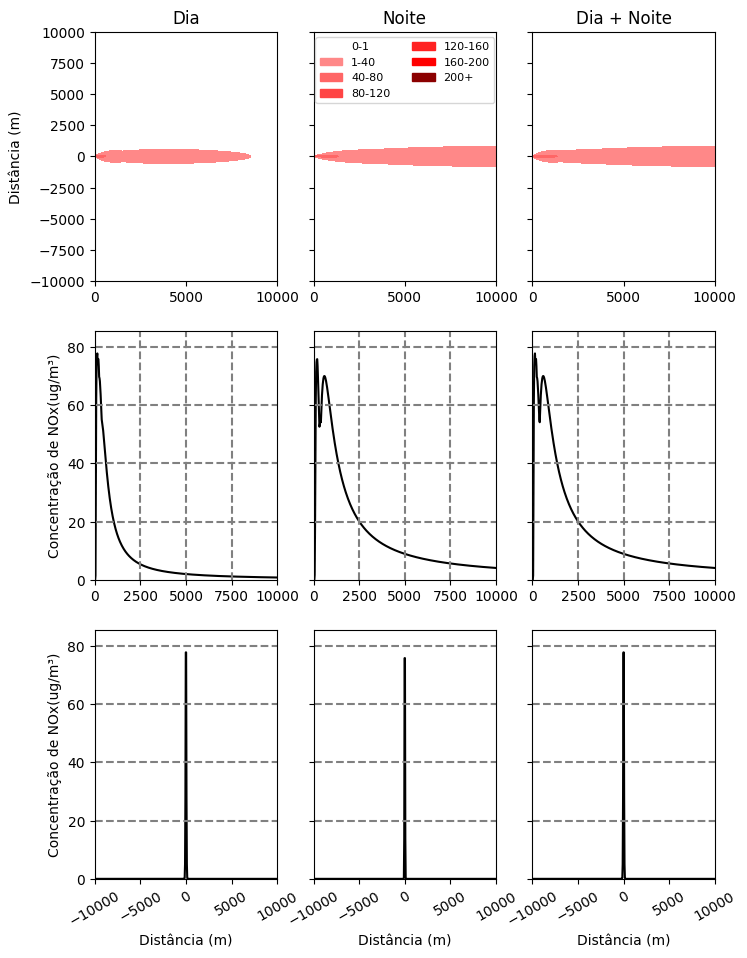

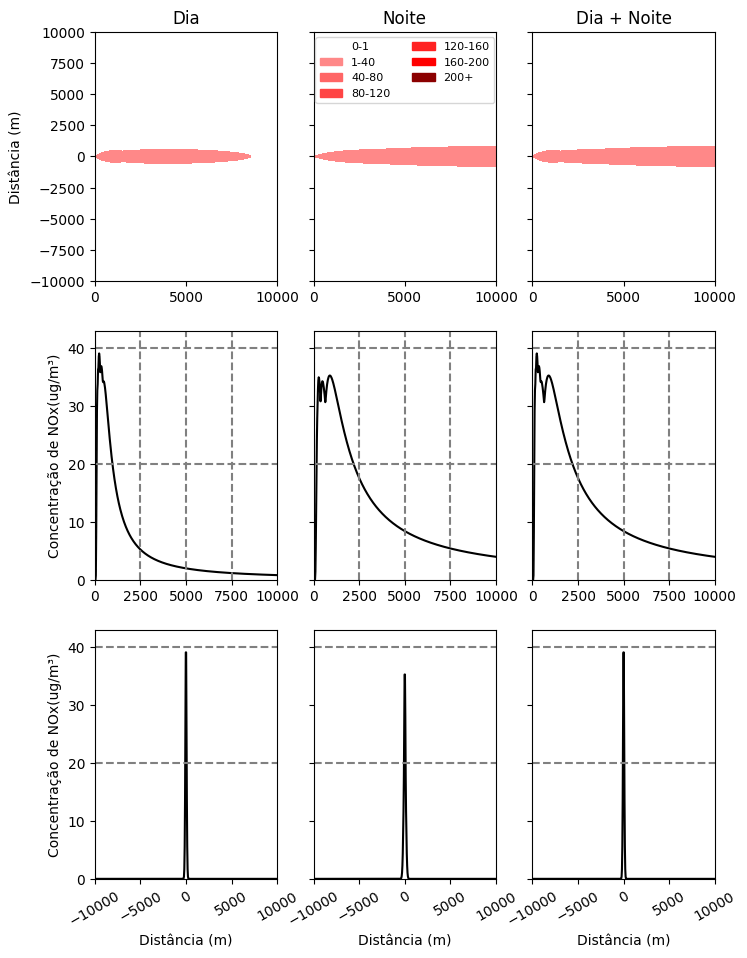

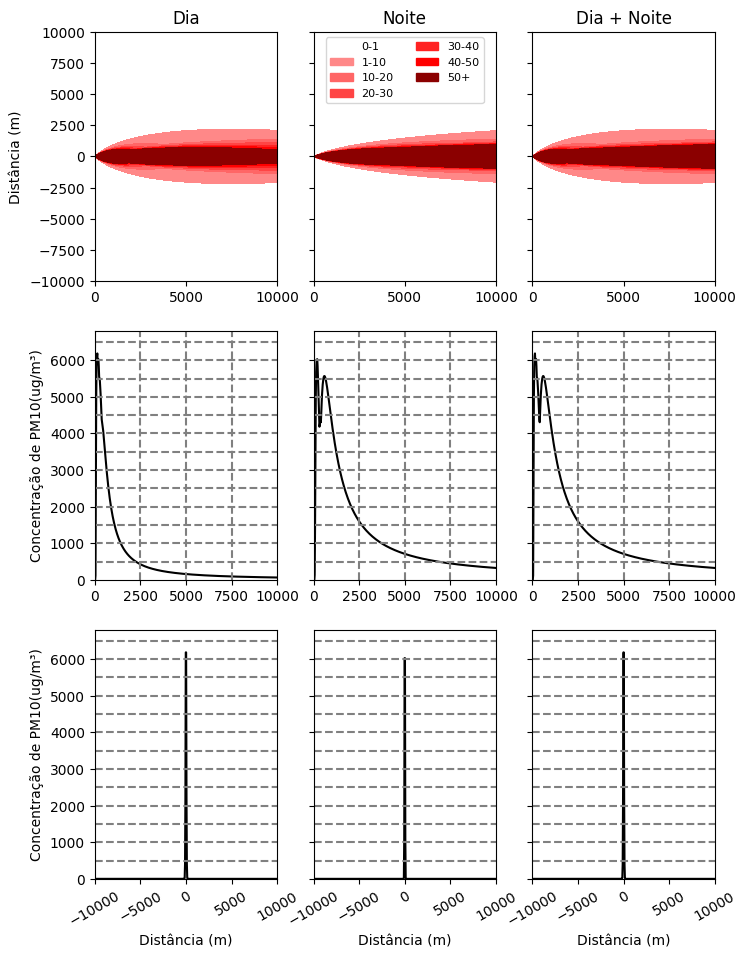

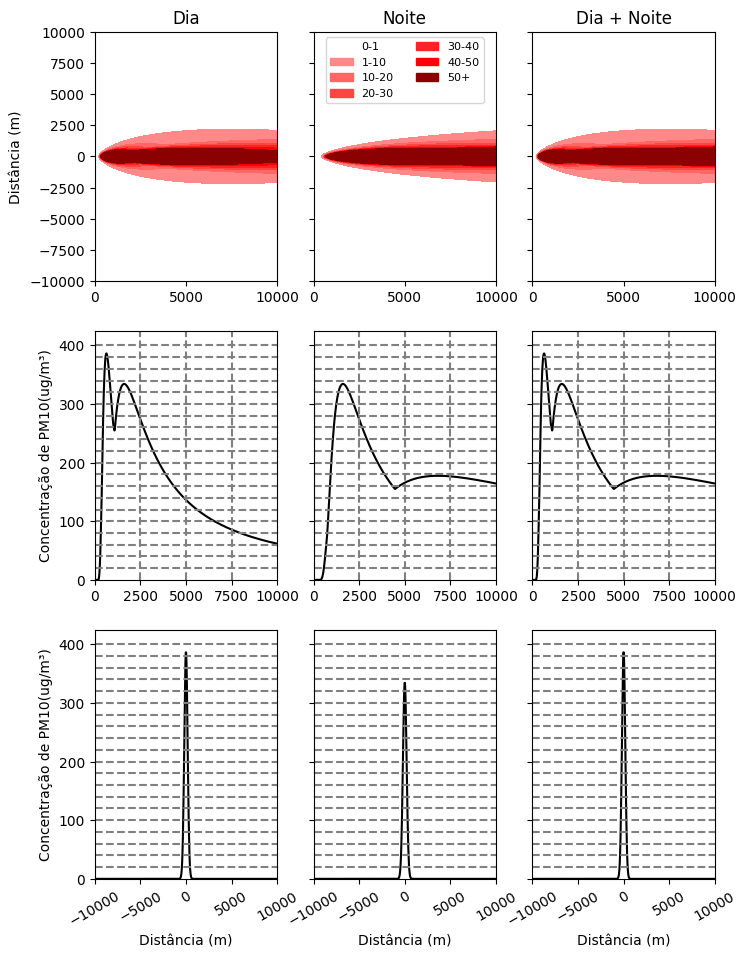

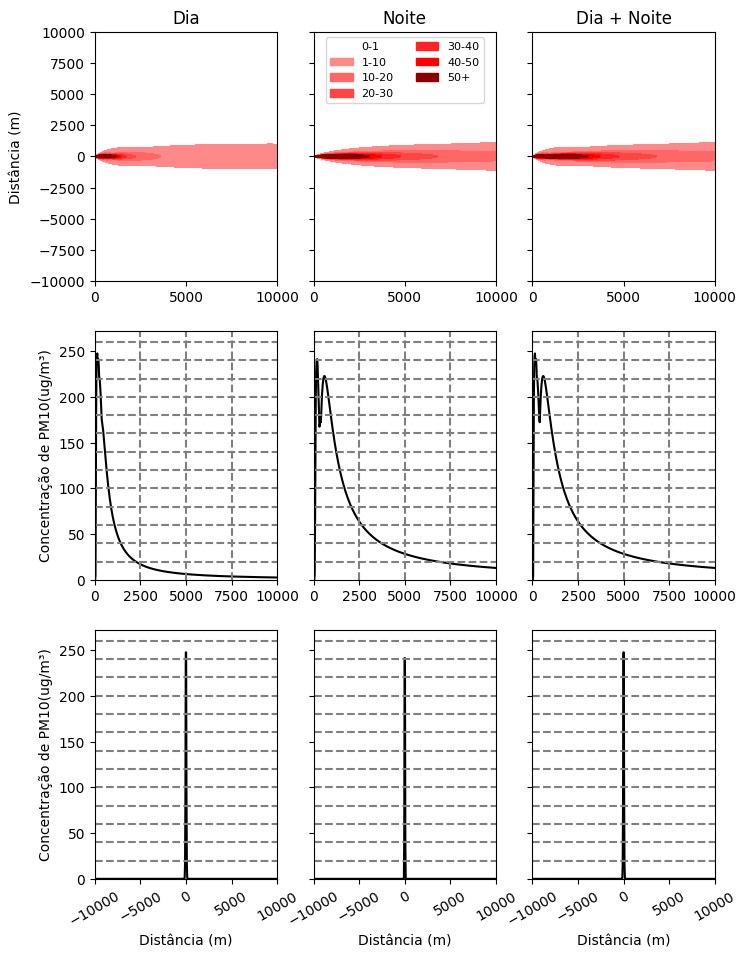

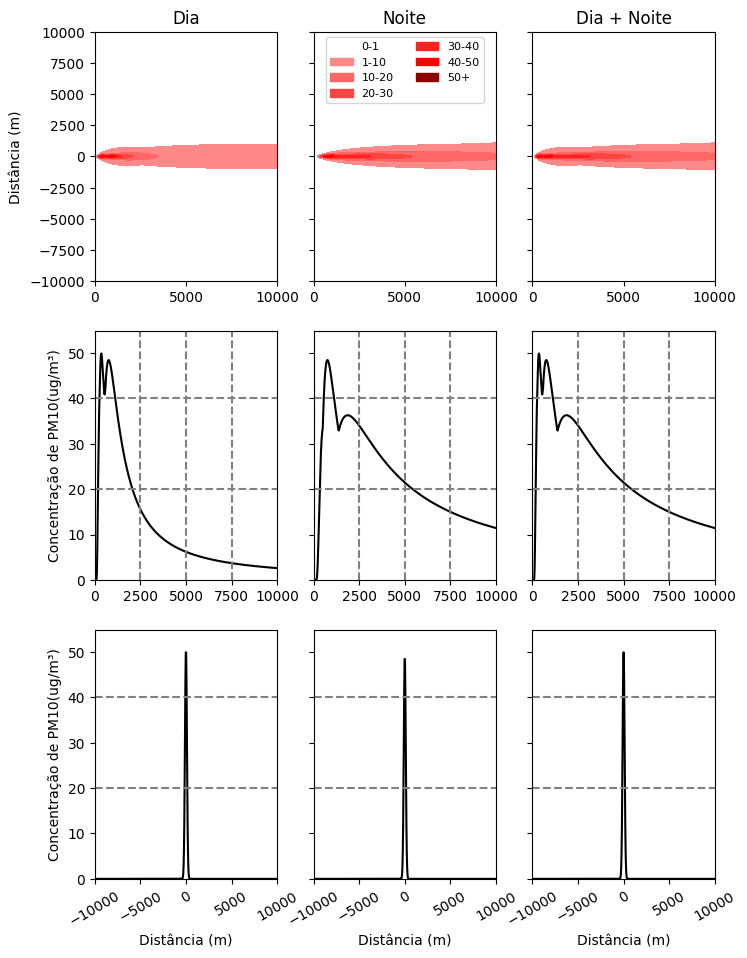

In [245]:

import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap
import matplotlib.patches as mpatches

#Calculando sobrelevação da pluma

hg = 10 # altura da chaminé
z = 1.5 # altura do nariz
d = 1 # em metros
vs = 10 # em m/s
Ts = 400 # em Kelvin
Tamb = 293 # em Kelvin

# Define os labels e colors para legendas
labelsPM10 = ['0-1', '1-10', '10-20', '20-30', '30-40', '40-50', '50+']
labelsNOX = ['0-1', '1-40', '40-80', '80-120', '120-160', '160-200', '200+']
colors = ['#FFFFFF', '#FF8888', '#FF6666', '#FF4444', '#FF2222', '#FF0000', '#8B0000']


for pol,a in zip(Poluente,range(6)):
    if a<2:
        poluente = 'NOx'
        limits = [0.0, 1.0, 40.0, 80.0, 120.0, 160.0, 200.0, 9999]
        labels =labelsNOX
    else:
        poluente = 'PM10'
        limits = [0.0, 1.0, 10.0, 20.0, 30.0, 40.0, 50.0, 9999]
        labels =labelsPM10
        
    for hg in range(10,201):
        hef = []
        
        for i in range(len(cco)):
            if vs>1.5*v[i]:
                # Estimando a sobrelevação da pluma (deltaH)
                deltaH = deltaHbriggs(d,vs,Ts,Tamb,classe[i],v[i])
                hef.append(hg+deltaH)
            else:
                hef.append(hg +2*d*((vs/v[i])-1.5))
        
        df_dispersao['Altura da chaminé efetiva (m)'] = hef 
    
        conc = []
        
        for i in range(len(cco)):
            concentracao = modeloGaussiano(pol,sigmaYlista[i],sigmaZlista[i],v[i],yy,z,hef[i])
            conc.append(concentracao)
        
        df_dispersao['Concentração (ug/m³)'] = conc
        
        conc_max = np.maximum.reduce(df_dispersao['Concentração (ug/m³)'].to_list())
        
        conc_lim = np.max(conc_max)
    
        print(hg)
        
        if conc_lim <= ConcLim[a] or hg == 200:
            # Criando dataframe pra dia e pra noite
            df_dia = df_dispersao[df_dispersao['Dia(0) ou noite(1)'] == 0]
            df_noite = df_dispersao[df_dispersao['Dia(0) ou noite(1)'] == 1]
            
            conc_max_dia = np.maximum.reduce(df_dia['Concentração (ug/m³)'].to_list())
            conc_max_noite = np.maximum.reduce(df_noite['Concentração (ug/m³)'].to_list())
            
            conc_lim_dia = np.max(conc_max_dia)
            conc_lim_noite = np.max(conc_max_noite)
            
            conc_lista = [conc_lim_dia, conc_lim_noite, conc_lim]
            conc_max = [conc_max_dia, conc_max_noite, conc_max]
            
            fig,ax = plt.subplots(3,3, figsize=(8,11), sharey='row')
            
            # Criando uma lista de cores para o mapa de cores discreto
            cmap = ListedColormap(colors)
            norm = BoundaryNorm(limits, cmap.N)
           
            for i in range(3):
                # Pegando os cortes com maiores valores
                lin = np.where(conc_max[i] == conc_lista[i])[0]
                col = np.where(conc_max[i] == conc_lista[i])[1]
    
                print(conc_lim)
                
                # Visualização dos resultados no espaço
                contour = ax[0, i].contourf(xx, yy, conc_max[i], levels=limits, cmap=cmap, norm=norm)

                if i == 0:
                    legend_handles = []
                    for color, label in zip(colors, labels):
                        # Cria um patch
                        patch = mpatches.Patch(color=color, label=label)
                        legend_handles.append(patch)

                    #  Adiciona a legenda
                    ax[0, 1].legend(handles=legend_handles, loc='upper center', fontsize=8, ncol=2)
                    
                # Corte em y - sobre o eixo x
                ax[1, i].plot(x,conc_max[i][lin[0],:],color='black')
                
                # Corte em x - sobre o eixo y 
                ax[2, i].plot(y,conc_max[i][:,col[1]],color='black')
        
                for ax_row in [ax[1, i], ax[2, i]]:
                    if conc_lim <= 500:
                        for h in range(20, round(conc_lim+20), 20):
                            ax_row.axhline(h, color='gray', linestyle='--')
                    else:
                        for h in range(500, round(conc_lim+500), 500):
                            ax_row.axhline(h, color='gray', linestyle='--')
        
                for vert in range(0, 10000, 2500):
                    ax[1, i].axvline(vert, color='gray', linestyle='--')
                
                # Configurando os limites dos eixos x e y para ax[1, i] e ax[2, i]
                ax[1, i].set_xlim(0, 10000)
                ax[1, i].set_ylim(0, conc_lim*1.1)
                
                ax[2, i].set_xlim(-10000, 10000)
                ax[2, i].set_ylim(0, conc_lim*1.1)
                ax[2, i].tick_params(axis='x', rotation=30)
                ax[2, i].set_xlabel('Distância (m)')
            
            ax[0,0].set_title('Dia')
            ax[0,1].set_title('Noite')
            ax[0,2].set_title('Dia + Noite')
        
            ax[0,0].set_ylabel('Distância (m)')
            ax[1,0].set_ylabel('Concentração de ' + poluente + '(ug/m³)')
            ax[2,0].set_ylabel('Concentração de ' + poluente + '(ug/m³)')

            fig.savefig(r'C:\Users\joseh\Documents\GitHub\ENS5173_202401\figures' + '\Dispersao'+ poluente + str(a)+'.png')
    
            break